<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [4]:
panelS11path = glob.glob('../../data_final/fig1_panel_c.pkl')
panel_S11 = pickle.load(open(panelS11path[0],'rb'))
panel_S11.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'f0', 'xtheo', 'ytheo', 'ytheolabel', 'xraw', 'yraw', 'xraw_th', 'yraw_th', 'xsig', 'ysig', 'ysigfit', 'ysigfitbg', 'xlabel', 'ylabel', 'params'])

In [5]:
dpi = 1000
annsz = 8
figtextsize=10

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


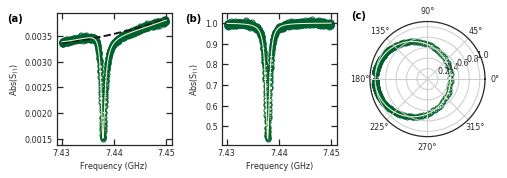

In [7]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 3, wspace=0.4)

axa = fig.add_subplot(gs[0, 0])
plt.plot(panel_S11['xsig'],
         np.abs(panel_S11['ysig']),
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         label='Abs(S$_{11}$)',
         zorder=-1)
plt.plot(panel_S11['xsig'], np.abs(panel_S11['ysigfit']), c=cmap(0.9), lw=1)
plt.plot(panel_S11['xsig'],
         np.abs(panel_S11['ysigfitbg']),
         c='k',
         lw=2,
         ls='--',
         zorder=-1)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Abs(S$_{11}$)')
#plt.xlim(7.432,7.444)

axb = fig.add_subplot(gs[0, 1])
plt.plot(panel_S11['xmeas'],
         np.abs(panel_S11['ymeas']),
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         label='Re(S$_{11}$)',
         zorder=-1)
plt.plot(panel_S11['xtheo'], np.abs(panel_S11['ytheo']), c=cmap(0.9), lw=1)
#plt.plot(panel_S11['xmeas'][::2],np.imag(panel_S11['ymeas'])[::2],'s',c=cmap(0.5),markerfacecolor='none',label='Im(S$_{11}$)')
#plt.plot(panel_S11['xtheo'],np.imag(panel_S11['ytheo']),c=cmap(0.9),lw=1)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Abs(S$_{11}$)')
#plt.xlim(7.432,7.444)
#plt.legend(loc='lower right')

axc = fig.add_subplot(gs[:, 2], projection='polar')
plt.plot(np.angle(panel_S11['ymeas']),
         np.abs(panel_S11['ymeas']),
         'o',
         c=cmap(0.1),
         markerfacecolor='none',
         zorder=-1)
plt.plot(np.angle(panel_S11['ytheo']),
         np.abs(panel_S11['ytheo']),
         c=cmap(0.9),
         lw=1,
         zorder=-1)
axc.set_rlim(0, 1.1)

axa.text(-0.36,
         0.96,
         '(a)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axa.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axb.text(-0.25,
         0.96,
         '(b)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axb.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
axc.text(-0.1,
         1.05,
         '(c)',
         fontsize=figtextsize,
         color='black',
         weight='bold',
         transform=axc.transAxes,
         verticalalignment='center',
         horizontalalignment='center')

plt.savefig('SM_reflection_coefficient.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()